# PRICES IN TURKEY

Prices in Turkey change frequently because of the economical conditions. These situation affects welfare level of the population negatively. That is why I decide to see how these prices changes over the years.
The source of the data is [The Humanitarian Data Exchange](https://data.humdata.org/)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
url = "https://data.humdata.org/dataset/5b184049-f8ee-4b55-a867-1409de538ff8/resource/33f303b8-4557-424e-8205-227b889f00e5/download/wfp_food_prices_turkey.csv"
TurkeyFoodPrice = pd.read_csv(url)
#remove first row because it is a header row
TurkeyFoodPrice = TurkeyFoodPrice.iloc[1:]
TurkeyFoodPrice.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2013-05-15,Rice - Retail,KG,cereals and tubers,4.492,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
2,2013-06-15,Rice - Retail,KG,cereals and tubers,4.5786,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
3,2013-11-15,Rice - Retail,KG,cereals and tubers,4.7865,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
4,2013-12-15,Rice - Retail,KG,cereals and tubers,5.1337,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
5,2014-01-15,Rice - Retail,KG,cereals and tubers,5.5099,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN


In [4]:
TurkeyFoodPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10483 entries, 1 to 10483
Data columns (total 17 columns):
date        10483 non-null object
cmname      10483 non-null object
unit        10483 non-null object
category    10483 non-null object
price       10483 non-null object
currency    10483 non-null object
country     10483 non-null object
admname     0 non-null object
adm1id      10483 non-null object
mktname     10483 non-null object
mktid       10483 non-null float64
cmid        10483 non-null object
ptid        10483 non-null float64
umid        10483 non-null float64
catid       10483 non-null object
sn          10483 non-null object
default     0 non-null float64
dtypes: float64(4), object(13)
memory usage: 1.4+ MB


In [5]:
#drop null columns
TurkeyFoodPrice = TurkeyFoodPrice.dropna(axis=1,how='all')
#convert price from object to numeric
TurkeyFoodPrice["price"] = pd.to_numeric(TurkeyFoodPrice["price"],errors = 'coerce')
TurkeyFoodPrice["date"] = pd.to_datetime(TurkeyFoodPrice["date"], errors = 'coerce')
TurkeyFoodPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10483 entries, 1 to 10483
Data columns (total 15 columns):
date        10483 non-null datetime64[ns]
cmname      10483 non-null object
unit        10483 non-null object
category    10483 non-null object
price       10483 non-null float64
currency    10483 non-null object
country     10483 non-null object
adm1id      10483 non-null object
mktname     10483 non-null object
mktid       10483 non-null float64
cmid        10483 non-null object
ptid        10483 non-null float64
umid        10483 non-null float64
catid       10483 non-null object
sn          10483 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 1.2+ MB


In [6]:
TFP = TurkeyFoodPrice.set_index("date")
TFP.head()

,cmname,unit,category,price,currency,country,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
date,,,,,,,,,,,,,,
2013-05-15,Rice - Retail,KG,cereals and tubers,4.4920,TRY,Turkey,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5
2013-06-15,Rice - Retail,KG,cereals and tubers,4.5786,TRY,Turkey,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5
2013-11-15,Rice - Retail,KG,cereals and tubers,4.7865,TRY,Turkey,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5
2013-12-15,Rice - Retail,KG,cereals and tubers,5.1337,TRY,Turkey,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5
2014-01-15,Rice - Retail,KG,cereals and tubers,5.5099,TRY,Turkey,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5


In [8]:
x = TFP.loc[TFP["cmname"]=="Rice - Retail"]
x["mktname"].value_counts()

National Average    84
Istanbul            54
Izmir               54
Ankara              54
Name: mktname, dtype: int64

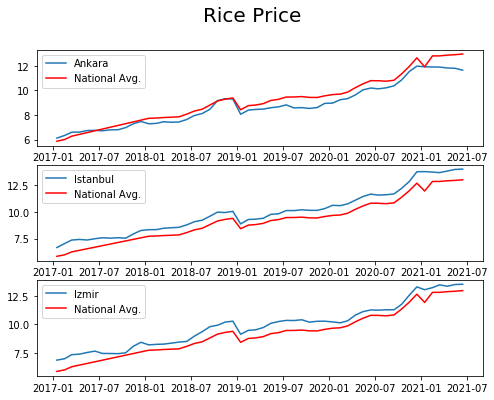

In [10]:
x_ankara = x[x["mktname"] == "Ankara"]
x_izmir = x[x["mktname"] == "Izmir"]
x_istanbul = x[x["mktname"] == "Istanbul"]
x_navg = x[(x["mktname"] == "National Average") & (x.index > "15-12-2016")]

#figure out the changes of Rice prices in time and compare the prices in different cities with National Average
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle("Rice Price", fontsize =20)
axs[0].plot(x_ankara["price"], label = "Ankara")
axs[0].plot(x_navg["price"], color = "red", label="National Avg.")
axs[0].legend()
axs[1].plot(x_istanbul["price"], label = "Istanbul")
axs[1].plot(x_navg["price"], color = "red", label="National Avg.")
axs[1].legend()
axs[2].plot(x_izmir["price"], label = "Izmir")
axs[2].plot(x_navg["price"], color = "red", label="National Avg.")
axs[2].legend()
plt.show()

As we see in the graphs, Rice Price in both Istanbul and Izmir is always above National Average but not it is not true for Ankara.

In [11]:
#return to pivot table to compare National Average price with the other cities
pivot_table = pd.pivot_table(x,index="date", columns=["mktname"], values = ["price"])
pivot_table = pivot_table.dropna()
pivot_table.head()

price                                  
mktname     Ankara Istanbul   Izmir National Average
date                                                
2017-01-15  6.1241   6.6842  6.8621           5.8700
2017-02-15  6.3395   7.0574  6.9848           6.0100
2017-03-15  6.6029   7.3779  7.3413           6.2800
2018-01-15  7.2880   8.3391  8.2019           7.7321
2018-02-15  7.3211   8.3470  8.2484           7.7563

I wanted to use different approch so I turned the data frame into pivot table to see prices in all cities and National Average.  

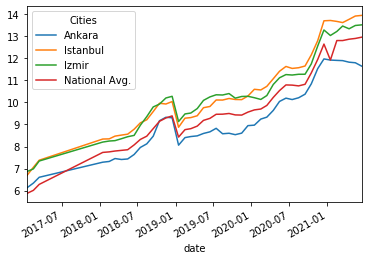

In [12]:
fig = pivot_table.plot()
fig.legend(["Ankara","Istanbul","Izmir","National Avg."],title = "Cities")

Rice Prices in Ankara is always under National Average but it is not true for Istanbul and Izmir. Although Ankara is bigger than Izmir, why is the price in Izmir higher than in Ankara? This question should be investigated in the future but I need extra dataset to find the reason of this result.

In [13]:
TFP2 = TurkeyFoodPrice[["category", "cmname","price","mktname","date"]]
TFP2['year'] = pd.DatetimeIndex(TFP2['date']).year

/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now, I grouped the data by year, mktname and cname to merge first and last prices in the same table, and then calculate the increase of the price.

In [16]:
TFP_groupfirst = TFP2.groupby(["year","mktname","cmname"]).agg({"price":"first","date":"min"})
TFP_groupfirst = TFP_groupfirst.rename(columns={"price":"price_first", "date":"date_first"})

In [17]:
TFP_grouplast = TFP2.groupby(["year","mktname","cmname"]).agg({"price":"last","date":"max"})
TFP_grouplast = TFP_grouplast.rename(columns={"price":"price_last", "date":"date_last"})

In [18]:
TFP_grouplast.reset_index()

,year,mktname,cmname,price_last,date_last
0,2013,National Average,Apples (red) - Retail,1.8533,2013-12-15
1,2013,National Average,Bananas - Retail,3.9652,2013-12-15
2,2013,National Average,Beans (white) - Retail,8.5757,2013-12-15
3,2013,National Average,Bread (common) - Retail,2.9149,2013-12-15
4,2013,National Average,Bulgur - Retail,2.4369,2013-12-15
...,...,...,...,...,...
1066,2021,National Average,Tomatoes - Retail,4.4280,2021-06-15
1067,2021,National Average,Water - Retail,5.7340,2021-06-15
1068,2021,National Average,Wheat flour - Retail,5.3005,2021-06-15
1069,2021,National Average,Yogurt - Retail,7.5681,2021-06-15


In [19]:
TFP_groupfirst.reset_index()

,year,mktname,cmname,price_first,date_first
0,2013,National Average,Apples (red) - Retail,2.2489,2013-05-15
1,2013,National Average,Bananas - Retail,4.0779,2013-05-15
2,2013,National Average,Beans (white) - Retail,5.8919,2013-05-15
3,2013,National Average,Bread (common) - Retail,2.7824,2013-05-15
4,2013,National Average,Bulgur - Retail,2.3898,2013-05-15
...,...,...,...,...,...
1066,2021,National Average,Tomatoes - Retail,5.1874,2021-01-15
1067,2021,National Average,Water - Retail,5.2435,2021-01-15
1068,2021,National Average,Wheat flour - Retail,4.5195,2021-01-15
1069,2021,National Average,Yogurt - Retail,7.4779,2021-01-15


In [20]:
#inner join
TFP_join = pd.concat([TFP_groupfirst, TFP_grouplast], axis=1, join="inner")
TFP_join

price_first date_first  \
year mktname          cmname                                            
2013 National Average Apples (red) - Retail         2.2489 2013-05-15   
                      Bananas - Retail              4.0779 2013-05-15   
                      Beans (white) - Retail        5.8919 2013-05-15   
                      Bread (common) - Retail       2.7824 2013-05-15   
                      Bulgur - Retail               2.3898 2013-05-15   
...                                                    ...        ...   
2021 National Average Tomatoes - Retail             5.1874 2021-01-15   
                      Water - Retail                5.2435 2021-01-15   
                      Wheat flour - Retail          4.5195 2021-01-15   
                      Yogurt - Retail               7.4779 2021-01-15   
                      Zucchini - Retail             4.9702 2021-01-15   

                                               price_last  date_last  
year mktname          cmname                                          
2013 National Average Apples (red) - Retail        1.8533 2013-12-15  
                      Bananas - Retail             3.9652 2013-12-15  
                      Beans (white) - Retail       8.5757 2013-12-15  
                      Bread (common) - Retail      2.9149 2013-12-15  
                      Bulgur - Retail              2.4369 2013-12-15  
...                                                   ...        ...  
2021 National Average Tomatoes - Retail            4.4280 2021-06-15  
                      Water - Retail               5.7340 2021-06-15  
                      Wheat flour - Retail         5.3005 2021-06-15  
                      Yogurt - Retail              7.5681 2021-06-15  
                      Zucchini - Retail            4.4984 2021-06-15  

[1071 rows x 4 columns]

In [21]:
TFP_join["price_last"] = pd.to_numeric(TFP_join["price_last"],errors = 'coerce')
TFP_join["price_first"] = pd.to_numeric(TFP_join["price_first"],errors = 'coerce')
#calculate the price change and append it to dataframe as new column
TFP_join["price_change"] = ((TFP_join["price_last"] - TFP_join["price_first"])/TFP_join["price_first"])*100

In [22]:
TFP_join.sort_values(by =["year","price_change"])

price_first date_first  \
year mktname          cmname                                            
2013 National Average Oranges - Retail              5.9520 2013-11-15   
                      Cauliflower - Retail          2.3045 2013-11-15   
                      Apples (red) - Retail         2.2489 2013-05-15   
                      Onions - Retail               1.1584 2013-05-15   
                      Meat (chicken) - Retail       7.3100 2013-05-15   
...                                                    ...        ...   
2021 Ankara           Cauliflower - Retail          2.9012 2021-01-15   
                      Fuel (gas) - Retail           7.2555 2021-01-15   
     Izmir            Fuel (gas) - Retail           7.3209 2021-01-15   
     National Average Fuel (gas) - Retail           7.2555 2021-01-15   
     Istanbul         Fuel (gas) - Retail           7.2120 2021-01-15   

                                               price_last  date_last  \
year mktname          cmname                                           
2013 National Average Oranges - Retail             1.6324 2013-12-15   
                      Cauliflower - Retail         1.7894 2013-12-15   
                      Apples (red) - Retail        1.8533 2013-12-15   
                      Onions - Retail              0.9735 2013-12-15   
                      Meat (chicken) - Retail      6.4668 2013-12-15   
...                                                   ...        ...   
2021 Ankara           Cauliflower - Retail         5.5333 2021-03-15   
                      Fuel (gas) - Retail        111.9209 2021-06-15   
     Izmir            Fuel (gas) - Retail        119.2971 2021-06-15   
     National Average Fuel (gas) - Retail        119.3121 2021-06-15   
     Istanbul         Fuel (gas) - Retail        121.5821 2021-06-15   

                                               price_change  
year mktname          cmname                                 
2013 National Average Oranges - Retail           -72.573925  
                      Cauliflower - Retail       -22.351920  
                      Apples (red) - Retail      -17.590822  
                      Onions - Retail            -15.961671  
                      Meat (chicken) - Retail    -11.534884  
...                                                     ...  
2021 Ankara           Cauliflower - Retail        90.724528  
                      Fuel (gas) - Retail       1442.566329  
     Izmir            Fuel (gas) - Retail       1529.541450  
     National Average Fuel (gas) - Retail       1544.436634  
     Istanbul         Fuel (gas) - Retail       1585.830560  

[1071 rows x 5 columns]

When looking at the tail of dataframe, there is a meaningless increase for Fuel(gas). There are several reasons:
* different products 
* different units
* wrong data entry
 
 For this purpose, I decide to check data to see anything wrong in my calculation for Fuel (gas).

In [23]:
TurkeyFoodPrice[TurkeyFoodPrice['cmname']=='Fuel (gas) - Retail']

,date,cmname,unit,category,price,currency,country,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
2369,2015-06-15,Fuel (gas) - Retail,12 KG,non-food,63.4300,TRY,Turkey,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90
2370,2015-07-15,Fuel (gas) - Retail,12 KG,non-food,63.0500,TRY,Turkey,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90
2371,2015-08-15,Fuel (gas) - Retail,12 KG,non-food,62.6300,TRY,Turkey,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90
2372,2015-09-15,Fuel (gas) - Retail,12 KG,non-food,62.7600,TRY,Turkey,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90
2373,2015-10-15,Fuel (gas) - Retail,12 KG,non-food,62.7600,TRY,Turkey,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,2020-12-15,Fuel (gas) - Retail,12 KG,non-food,102.3353,TRY,Turkey,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90
9660,2021-01-15,Fuel (gas) - Retail,12 KG,non-food,7.3209,TRY,Turkey,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90
9661,2021-02-15,Fuel (gas) - Retail,12 KG,non-food,7.3257,TRY,Turkey,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90
9662,2021-03-15,Fuel (gas) - Retail,12 KG,non-food,7.2588,TRY,Turkey,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90


Now, I will look at the price changes of Bulgur and Bread because the base of these two is same: Wheat. My assumption is if the price increase for one of these two, the price of the other one should increase.

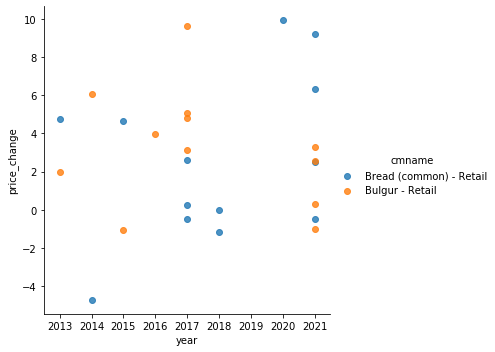

In [24]:
TFP_joinr = TFP_join.reset_index()

sns.lmplot(x='year', y ='price_change',hue ='cmname',
           data=TFP_joinr[(((TFP_joinr['cmname'] == 'Bread (common) - Retail' ) | (TFP_joinr['cmname'] == 'Bulgur - Retail' ))
                                        &(TFP_joinr['price_change'] > -10)&(TFP_joinr['price_change'] < 10))], fit_reg=False)

Now I will compare the price changes of Wheat and the products based on Wheat.

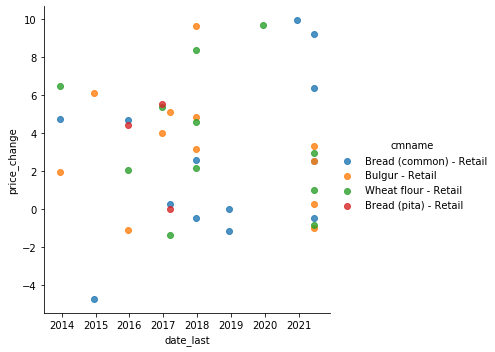

In [25]:
lists = ['Bread (pita) - Retail','Wheat flour - Retail','Bulgur - Retail', 'Bread (common) - Retail']
sns.lmplot(x='date_last', y ='price_change',hue ='cmname',
           data=TFP_joinr[((TFP_joinr['cmname'].isin(lists))
                            &(TFP_joinr['price_change'] > -10)&(TFP_joinr['price_change'] < 10))], fit_reg=False)

As we can see on the chart, when the price change of wheat is under zero, the products based on Wheat prices increased or vice versa. This shows us that the product price changes is not only related with the price of based product but also related with the other costs, such as logistics, wages, electricity. 